In [1]:
import pandas as pd
import json

In [2]:
# Step 1: Check CSV
csv_path = 'Data/tree-loss-provincewise-2001-2023.csv'
df_csv = pd.read_csv(csv_path)
print("CSV Dataset Preview:")
print(df_csv.head())
print("\nCSV Columns:", df_csv.columns.tolist())

CSV Dataset Preview:
  country subnational1  threshold  area_ha  extent_2000_ha  extent_2010_ha  \
0   Nepal      Central          0  2746667         2746667         2746667   
1   Nepal      Central         10  2746667         1253579         1262426   
2   Nepal      Central         15  2746667         1217678         1204804   
3   Nepal      Central         20  2746667         1206665         1195016   
4   Nepal      Central         25  2746667         1192215         1163339   

   gain_2000-2020_ha  tc_loss_ha_2001  tc_loss_ha_2002  tc_loss_ha_2003  ...  \
0              49545              508              479              738  ...   
1              49545              470              427              654  ...   
2              49545              463              414              636  ...   
3              49545              457              407              624  ...   
4              49545              451              401              614  ...   

   tc_loss_ha_2014  tc_loss_h

In [4]:
# Step 2: Check JSON
json_path = 'Data/NPL-weather-from1950-2023.json'
with open(json_path) as f:
    treeloss_data = json.load(f)

print("\nJSON Keys/Structure:")
print(treeloss_data.keys() if isinstance(treeloss_data, dict) else type(treeloss_data))



JSON Keys/Structure:
dict_keys(['metadata', 'data'])


In [5]:
# Let's explore the 'data' key in the JSON
print("Type of 'data' key:", type(treeloss_data['data']))

# If it's a list, print the first item
if isinstance(treeloss_data['data'], list):
    print("\nFirst record in 'data':")
    print(treeloss_data['data'][0])
elif isinstance(treeloss_data['data'], dict):
    print("\nKeys inside 'data':")
    print(treeloss_data['data'].keys())
else:
    print("\nUnknown structure inside 'data'.")


Type of 'data' key: <class 'dict'>

Keys inside 'data':
dict_keys(['hd35', 'pr', 'tas'])


In [6]:
# Let's check the type and first few values in 'pr' key
print("Type of 'pr':", type(treeloss_data['data']['pr']))

# If it’s a list, print the first few items
if isinstance(treeloss_data['data']['pr'], list):
    print("First few items in 'pr':", treeloss_data['data']['pr'][:5])
elif isinstance(treeloss_data['data']['pr'], dict):
    print("Keys inside 'pr':", treeloss_data['data']['pr'].keys())
else:
    print("Unknown structure for 'pr'.")


Type of 'pr': <class 'dict'>
Keys inside 'pr': dict_keys(['NPL'])


In [7]:
# Check type and sample of the precipitation data for Nepal
print("Type of 'pr'['NPL']:", type(treeloss_data['data']['pr']['NPL']))

# If it’s a list, show the first 5 items
if isinstance(treeloss_data['data']['pr']['NPL'], list):
    print("First 5 precipitation values:", treeloss_data['data']['pr']['NPL'][:5])
elif isinstance(treeloss_data['data']['pr']['NPL'], dict):
    print("Keys inside 'pr'['NPL']:", treeloss_data['data']['pr']['NPL'].keys())
else:
    print("Unknown structure inside 'pr'['NPL'].")


Type of 'pr'['NPL']: <class 'dict'>
Keys inside 'pr'['NPL']: dict_keys(['1950-01', '1950-02', '1950-03', '1950-04', '1950-05', '1950-06', '1950-07', '1950-08', '1950-09', '1950-10', '1950-11', '1950-12', '1951-01', '1951-02', '1951-03', '1951-04', '1951-05', '1951-06', '1951-07', '1951-08', '1951-09', '1951-10', '1951-11', '1951-12', '1952-01', '1952-02', '1952-03', '1952-04', '1952-05', '1952-06', '1952-07', '1952-08', '1952-09', '1952-10', '1952-11', '1952-12', '1953-01', '1953-02', '1953-03', '1953-04', '1953-05', '1953-06', '1953-07', '1953-08', '1953-09', '1953-10', '1953-11', '1953-12', '1954-01', '1954-02', '1954-03', '1954-04', '1954-05', '1954-06', '1954-07', '1954-08', '1954-09', '1954-10', '1954-11', '1954-12', '1955-01', '1955-02', '1955-03', '1955-04', '1955-05', '1955-06', '1955-07', '1955-08', '1955-09', '1955-10', '1955-11', '1955-12', '1956-01', '1956-02', '1956-03', '1956-04', '1956-05', '1956-06', '1956-07', '1956-08', '1956-09', '1956-10', '1956-11', '1956-12', '195

In [8]:
# Convert precipitation dictionary to a DataFrame
import pandas as pd

# Extract the precipitation data
precip_dict = treeloss_data['data']['pr']['NPL']

# Convert to DataFrame
precip_df = pd.DataFrame(list(precip_dict.items()), columns=['Date', 'Precipitation'])

# Convert 'Date' column to datetime format
precip_df['Date'] = pd.to_datetime(precip_df['Date'])

# Check the result
print(precip_df.head())
print(precip_df.tail())


        Date  Precipitation
0 1950-01-01          68.81
1 1950-02-01         105.93
2 1950-03-01         103.13
3 1950-04-01          31.20
4 1950-05-01         100.59
          Date  Precipitation
883 2023-08-01         448.46
884 2023-09-01         196.90
885 2023-10-01          99.59
886 2023-11-01          18.61
887 2023-12-01          21.11


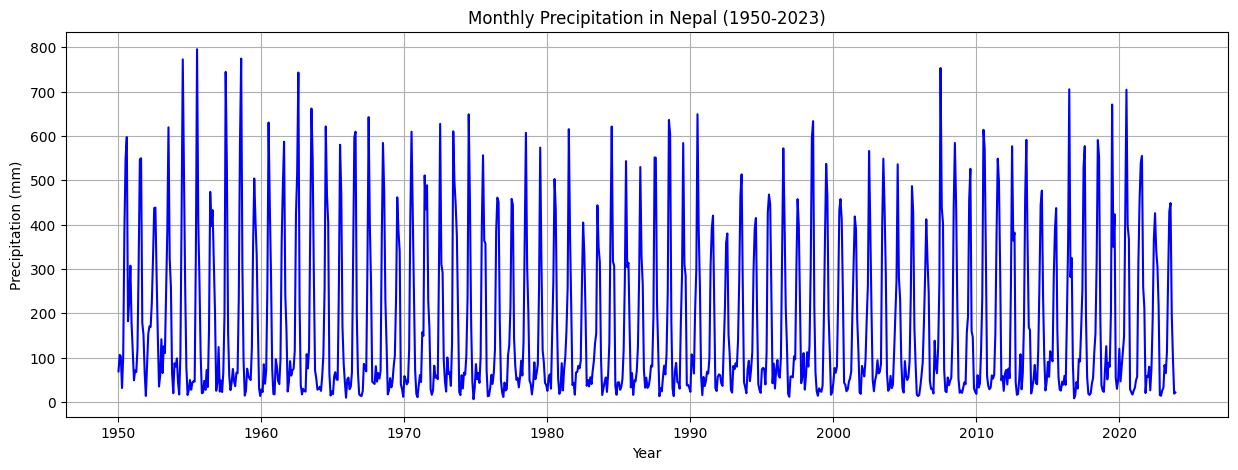

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(precip_df['Date'], precip_df['Precipitation'], color='blue')
plt.title('Monthly Precipitation in Nepal (1950-2023)')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()


You are seeing a time-series plot showing how precipitation has changed from 1950 to 2023.

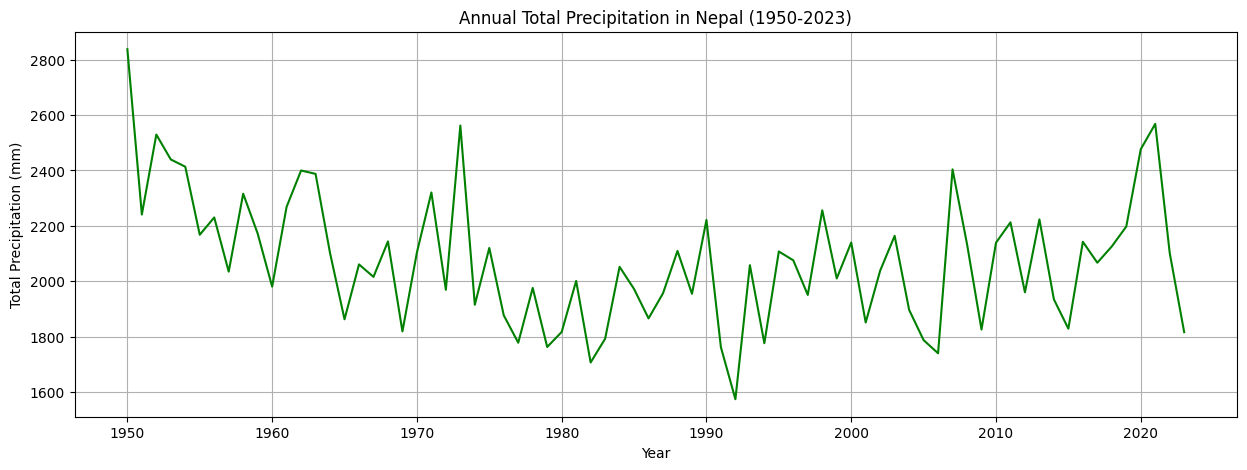

In [10]:
# Add a Year column
precip_df['Year'] = precip_df['Date'].dt.year

# Calculate total precipitation per year
annual_precip = precip_df.groupby('Year')['Precipitation'].sum().reset_index()

# Plot annual precipitation
plt.figure(figsize=(15,5))
plt.plot(annual_precip['Year'], annual_precip['Precipitation'], color='green')
plt.title('Annual Total Precipitation in Nepal (1950-2023)')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.grid(True)
plt.show()


CSV Data EDA Tasks (Forest Loss / Land Cover CSV)

In [11]:
import pandas as pd

csv_df = pd.read_csv('Data/tree-loss-provincewise-2001-2023.csv')  # Replace with your actual CSV filename

csv_df.describe(include='all')


,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
count,40,40,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
unique,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Nepal,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,40,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,28.125000,2.953250e+06,1.201386e+06,1.137633e+06,34801.600000,292.075000,409.275000,434.750000,...,234.525000,125.375000,213.975000,478.675000,345.450000,427.975000,474.925000,577.350000,425.525000,488.600000
std,NaN,NaN,22.777843,7.428873e+05,7.708511e+05,7.913446e+05,9174.445146,105.586612,303.621052,248.591494,...,164.930597,186.752639,199.629848,413.837847,226.950345,256.700013,301.189129,332.176239,258.974802,253.907494
min,NaN,NaN,0.000000,1.974934e+06,2.108300e+05,1.682020e+05,24558.000000,58.000000,44.000000,11.000000,...,26.000000,6.000000,21.000000,35.000000,42.000000,78.000000,72.000000,125.000000,70.000000,126.000000
25%,NaN,NaN,13.750000,2.746667e+06,8.897408e+05,8.223522e+05,26094.000000,216.500000,148.000000,310.750000,...,134.500000,25.500000,79.500000,120.750000,210.750000,205.500000,250.750000,361.500000,210.250000,322.250000
50%,NaN,NaN,22.500000,2.848465e+06,9.593120e+05,9.168900e+05,35610.000000,303.000000,399.000000,436.500000,...,175.500000,42.000000,139.500000,308.000000,254.500000,399.500000,426.500000,490.500000,367.500000,484.500000
75%,NaN,NaN,35.000000,2.946930e+06,1.275108e+06,1.201372e+06,38201.000000,335.250000,504.500000,627.000000,...,253.250000,72.250000,254.000000,901.250000,372.250000,504.250000,574.000000,646.000000,580.750000,583.000000


In [12]:
csv_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            40 non-null     object
 1   subnational1       40 non-null     object
 2   threshold          40 non-null     int64 
 3   area_ha            40 non-null     int64 
 4   extent_2000_ha     40 non-null     int64 
 5   extent_2010_ha     40 non-null     int64 
 6   gain_2000-2020_ha  40 non-null     int64 
 7   tc_loss_ha_2001    40 non-null     int64 
 8   tc_loss_ha_2002    40 non-null     int64 
 9   tc_loss_ha_2003    40 non-null     int64 
 10  tc_loss_ha_2004    40 non-null     int64 
 11  tc_loss_ha_2005    40 non-null     int64 
 12  tc_loss_ha_2006    40 non-null     int64 
 13  tc_loss_ha_2007    40 non-null     int64 
 14  tc_loss_ha_2008    40 non-null     int64 
 15  tc_loss_ha_2009    40 non-null     int64 
 16  tc_loss_ha_2010    40 non-null     int64 
 17 

In [13]:
#Check for missing value:
csv_df.isnull().sum()
csv_df.head()
csv_df.describe()



,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,tc_loss_ha_2005,...,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
count,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,28.125000,2.953250e+06,1.201386e+06,1.137633e+06,34801.600000,292.075000,409.275000,434.750000,472.850000,529.750000,...,234.525000,125.375000,213.975000,478.675000,345.450000,427.975000,474.925000,577.350000,425.525000,488.600000
std,22.777843,7.428873e+05,7.708511e+05,7.913446e+05,9174.445146,105.586612,303.621052,248.591494,224.280451,262.274739,...,164.930597,186.752639,199.629848,413.837847,226.950345,256.700013,301.189129,332.176239,258.974802,253.907494
min,0.000000,1.974934e+06,2.108300e+05,1.682020e+05,24558.000000,58.000000,44.000000,11.000000,114.000000,132.000000,...,26.000000,6.000000,21.000000,35.000000,42.000000,78.000000,72.000000,125.000000,70.000000,126.000000
25%,13.750000,2.746667e+06,8.897408e+05,8.223522e+05,26094.000000,216.500000,148.000000,310.750000,249.000000,290.500000,...,134.500000,25.500000,79.500000,120.750000,210.750000,205.500000,250.750000,361.500000,210.250000,322.250000
50%,22.500000,2.848465e+06,9.593120e+05,9.168900e+05,35610.000000,303.000000,399.000000,436.500000,435.500000,550.000000,...,175.500000,42.000000,139.500000,308.000000,254.500000,399.500000,426.500000,490.500000,367.500000,484.500000
75%,35.000000,2.946930e+06,1.275108e+06,1.201372e+06,38201.000000,335.250000,504.500000,627.000000,638.250000,767.500000,...,253.250000,72.250000,254.000000,901.250000,372.250000,504.250000,574.000000,646.000000,580.750000,583.000000
max,75.000000,4.249253e+06,4.249253e+06,4.249253e+06,49545.000000,508.000000,1036.000000,833.000000,1082.000000,944.000000,...,760.000000,795.000000,813.000000,1426.000000,1099.000000,1157.000000,1413.000000,1624.000000,1370.000000,1440.000000


#Sarts Here !!!

In [16]:
import json
import pandas as pd

# Step 1: Load CSV (Tree loss data)
csv_path = 'Data/tree-loss-provincewise-2001-2023.csv'
tree_loss_df = pd.read_csv(csv_path)

# Step 2: Check CSV structure
print("\nCSV Columns:", tree_loss_df.columns.tolist())
print("\nCSV First 5 Rows:")
print(tree_loss_df.head())

# Step 3: Load JSON (Weather data)
json_path = 'Data/NPL-weather-from1950-2023.json'
with open(json_path, 'r') as f:
    weather_data = json.load(f)

print("\nJSON Keys:", weather_data.keys())  # Should be ['metadata', 'data']

# Step 4: Extract Precipitation Data
pr_data = weather_data['data']['pr']['NPL']

# Step 5: Convert to DataFrame
pr_df = pd.DataFrame(list(pr_data.items()), columns=['Date', 'Precipitation'])

# Step 6: Convert 'Date' to datetime and set as index
pr_df['Date'] = pd.to_datetime(pr_df['Date'] + '-01')  # Adding '-01' to make valid dates
pr_df.set_index('Date', inplace=True)

print("\nPrecipitation DataFrame Head:")
print(pr_df.head())



CSV Columns: ['country', 'subnational1', 'threshold', 'area_ha', 'extent_2000_ha', 'extent_2010_ha', 'gain_2000-2020_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2002', 'tc_loss_ha_2003', 'tc_loss_ha_2004', 'tc_loss_ha_2005', 'tc_loss_ha_2006', 'tc_loss_ha_2007', 'tc_loss_ha_2008', 'tc_loss_ha_2009', 'tc_loss_ha_2010', 'tc_loss_ha_2011', 'tc_loss_ha_2012', 'tc_loss_ha_2013', 'tc_loss_ha_2014', 'tc_loss_ha_2015', 'tc_loss_ha_2016', 'tc_loss_ha_2017', 'tc_loss_ha_2018', 'tc_loss_ha_2019', 'tc_loss_ha_2020', 'tc_loss_ha_2021', 'tc_loss_ha_2022', 'tc_loss_ha_2023']

CSV First 5 Rows:
  country subnational1  threshold  area_ha  extent_2000_ha  extent_2010_ha  \
0   Nepal      Central          0  2746667         2746667         2746667   
1   Nepal      Central         10  2746667         1253579         1262426   
2   Nepal      Central         15  2746667         1217678         1204804   
3   Nepal      Central         20  2746667         1206665         1195016   
4   Nepal      Central         

 Exploratory Data Analysis (EDA)

In [17]:
#Tree loss basic exploration
# Shape of the CSV data
print("Tree Loss CSV shape:", tree_loss_df.shape)

# Data types and missing values
print("\nCSV Data Types:\n", tree_loss_df.dtypes)
print("\nMissing values per column:\n", tree_loss_df.isnull().sum())

# Unique values in categorical columns
print("\nUnique countries:", tree_loss_df['country'].unique())
print("Unique regions:", tree_loss_df['subnational1'].unique())


Tree Loss CSV shape: (40, 30)

CSV Data Types:
 country              object
subnational1         object
threshold             int64
area_ha               int64
extent_2000_ha        int64
extent_2010_ha        int64
gain_2000-2020_ha     int64
tc_loss_ha_2001       int64
tc_loss_ha_2002       int64
tc_loss_ha_2003       int64
tc_loss_ha_2004       int64
tc_loss_ha_2005       int64
tc_loss_ha_2006       int64
tc_loss_ha_2007       int64
tc_loss_ha_2008       int64
tc_loss_ha_2009       int64
tc_loss_ha_2010       int64
tc_loss_ha_2011       int64
tc_loss_ha_2012       int64
tc_loss_ha_2013       int64
tc_loss_ha_2014       int64
tc_loss_ha_2015       int64
tc_loss_ha_2016       int64
tc_loss_ha_2017       int64
tc_loss_ha_2018       int64
tc_loss_ha_2019       int64
tc_loss_ha_2020       int64
tc_loss_ha_2021       int64
tc_loss_ha_2022       int64
tc_loss_ha_2023       int64
dtype: object

Missing values per column:
 country              0
subnational1         0
threshold            0


In [18]:
#JSON basic exploration
# Shape of precipitation data
print("\nPrecipitation data shape:", pr_df.shape)

# Check time range
print("Date range:", pr_df.index.min().date(), "to", pr_df.index.max().date())

# Missing values
print("\nMissing values in precipitation data:", pr_df.isnull().sum())



Precipitation data shape: (888, 1)
Date range: 1950-01-01 to 2023-12-01

Missing values in precipitation data: Precipitation    0
dtype: int64


EDA Step 1: CSV and JSON Overview

In [19]:
### --- CSV: Tree Loss --- ###
print("===== CSV: Tree Loss Dataset =====")

# Shape
print("Shape:", tree_loss_df.shape)

# Data types
print("\nData Types:\n", tree_loss_df.dtypes)

# Missing values
print("\nMissing values per column:\n", tree_loss_df.isnull().sum())

# Unique values
print("\nUnique countries:", tree_loss_df['country'].unique())
print("Unique regions:", tree_loss_df['subnational1'].unique())



### --- JSON: Precipitation --- ###
print("\n\n===== JSON: Precipitation Dataset =====")

# Shape
print("Shape:", pr_df.shape)

# Date range
print("Date range:", pr_df.index.min().date(), "to", pr_df.index.max().date())

# Missing values
print("\nMissing values:\n", pr_df.isnull().sum())


===== CSV: Tree Loss Dataset =====
Shape: (40, 30)

Data Types:
 country              object
subnational1         object
threshold             int64
area_ha               int64
extent_2000_ha        int64
extent_2010_ha        int64
gain_2000-2020_ha     int64
tc_loss_ha_2001       int64
tc_loss_ha_2002       int64
tc_loss_ha_2003       int64
tc_loss_ha_2004       int64
tc_loss_ha_2005       int64
tc_loss_ha_2006       int64
tc_loss_ha_2007       int64
tc_loss_ha_2008       int64
tc_loss_ha_2009       int64
tc_loss_ha_2010       int64
tc_loss_ha_2011       int64
tc_loss_ha_2012       int64
tc_loss_ha_2013       int64
tc_loss_ha_2014       int64
tc_loss_ha_2015       int64
tc_loss_ha_2016       int64
tc_loss_ha_2017       int64
tc_loss_ha_2018       int64
tc_loss_ha_2019       int64
tc_loss_ha_2020       int64
tc_loss_ha_2021       int64
tc_loss_ha_2022       int64
tc_loss_ha_2023       int64
dtype: object

Missing values per column:
 country              0
subnational1         0
thresh

 Summary Statistics and Missing Data Visualization.

===== CSV Summary Statistics =====
       threshold       area_ha  extent_2000_ha  extent_2010_ha  \
count  40.000000  4.000000e+01    4.000000e+01    4.000000e+01   
mean   28.125000  2.953250e+06    1.201386e+06    1.137633e+06   
std    22.777843  7.428873e+05    7.708511e+05    7.913446e+05   
min     0.000000  1.974934e+06    2.108300e+05    1.682020e+05   
25%    13.750000  2.746667e+06    8.897408e+05    8.223522e+05   
50%    22.500000  2.848465e+06    9.593120e+05    9.168900e+05   
75%    35.000000  2.946930e+06    1.275108e+06    1.201372e+06   
max    75.000000  4.249253e+06    4.249253e+06    4.249253e+06   

       gain_2000-2020_ha  tc_loss_ha_2001  tc_loss_ha_2002  tc_loss_ha_2003  \
count          40.000000        40.000000        40.000000        40.000000   
mean        34801.600000       292.075000       409.275000       434.750000   
std          9174.445146       105.586612       303.621052       248.591494   
min         24558.000000        58.000000        44.00

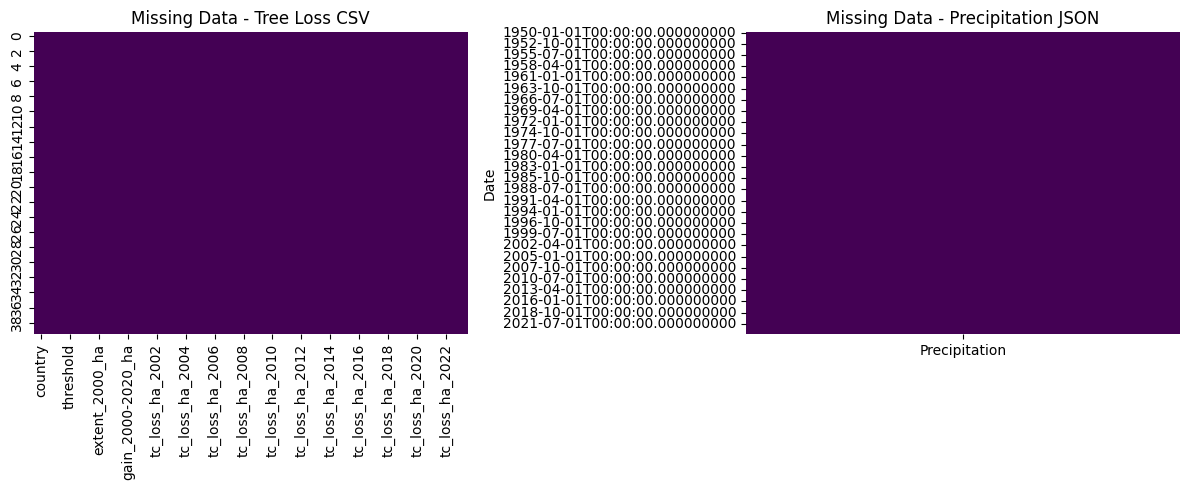

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

### --- CSV Summary --- ###
print("===== CSV Summary Statistics =====")
print(tree_loss_df.describe())

### --- JSON Summary --- ###
print("\n\n===== JSON Summary Statistics =====")
print(pr_df.describe())



### --- Missing Data Heatmaps --- ###
plt.figure(figsize=(12, 5))

# CSV missing data
plt.subplot(1, 2, 1)
sns.heatmap(tree_loss_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data - Tree Loss CSV')

# JSON missing data
plt.subplot(1, 2, 2)
sns.heatmap(pr_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data - Precipitation JSON')

plt.tight_layout()
plt.show()


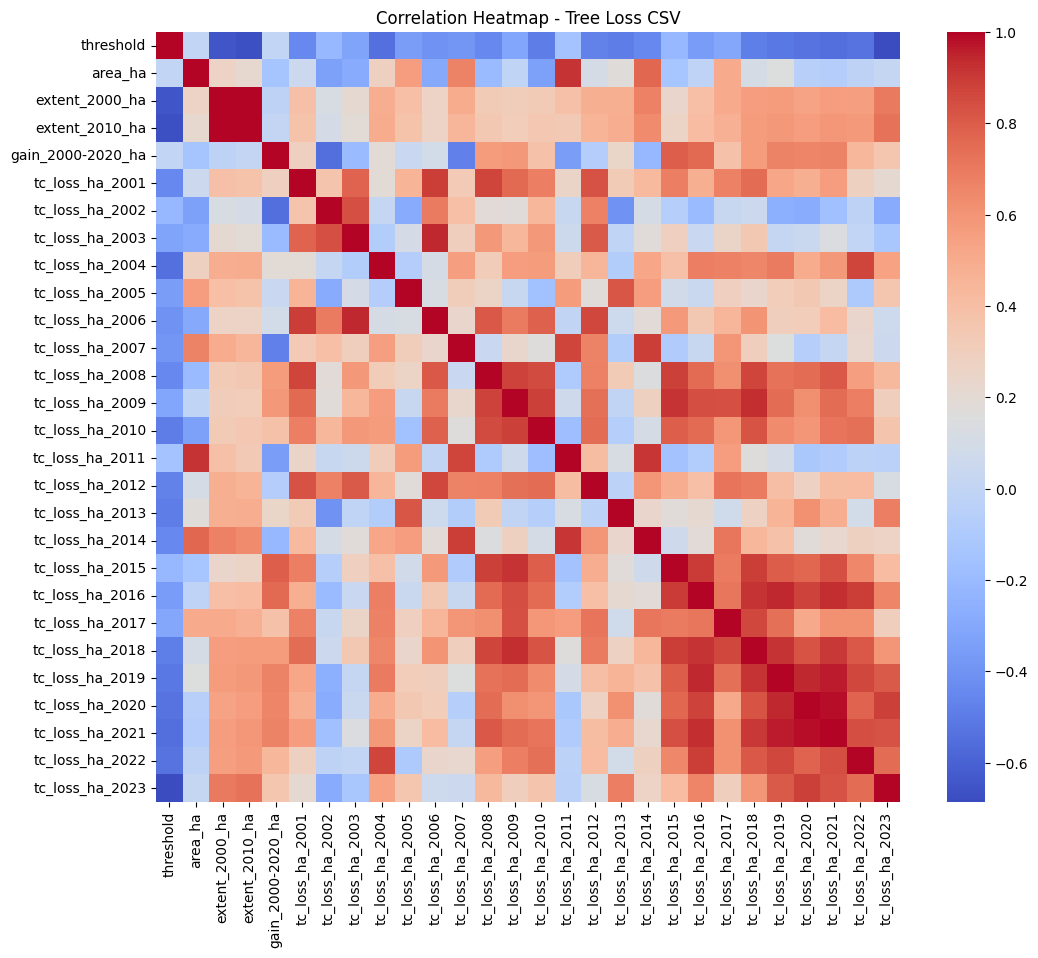

In [21]:
### --- CSV Correlation Heatmap --- ###
plt.figure(figsize=(12, 10))
correlation = tree_loss_df.corr(numeric_only=True)
sns.heatmap(correlation, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap - Tree Loss CSV')
plt.show()


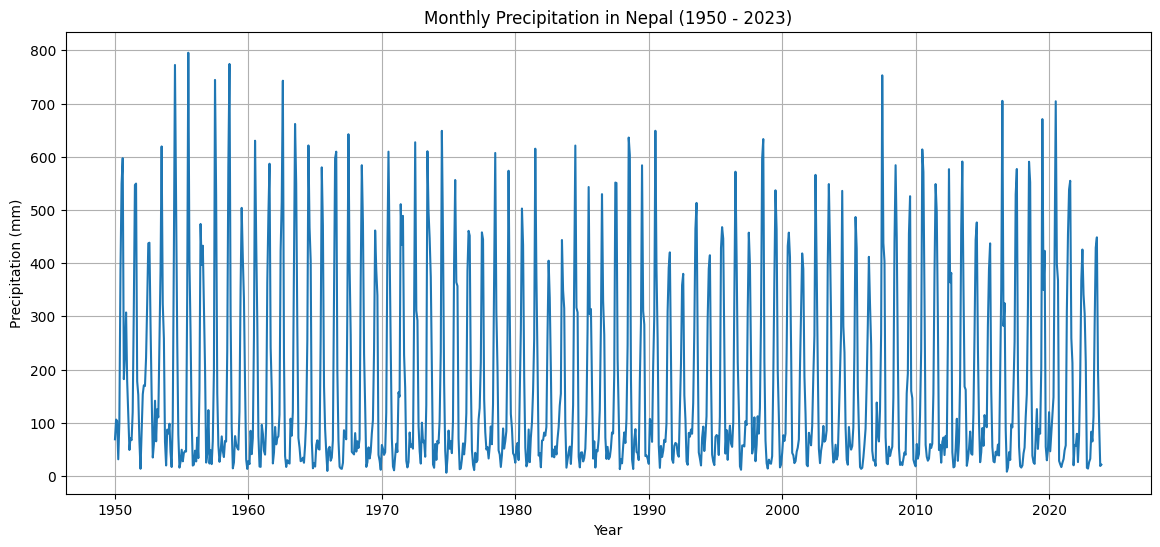

In [22]:
### --- JSON Precipitation Trend --- ###
plt.figure(figsize=(14, 6))
sns.lineplot(data=pr_df, x=pr_df.index, y='Precipitation')
plt.title('Monthly Precipitation in Nepal (1950 - 2023)')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()


Trend Insights and Regional Patterns.

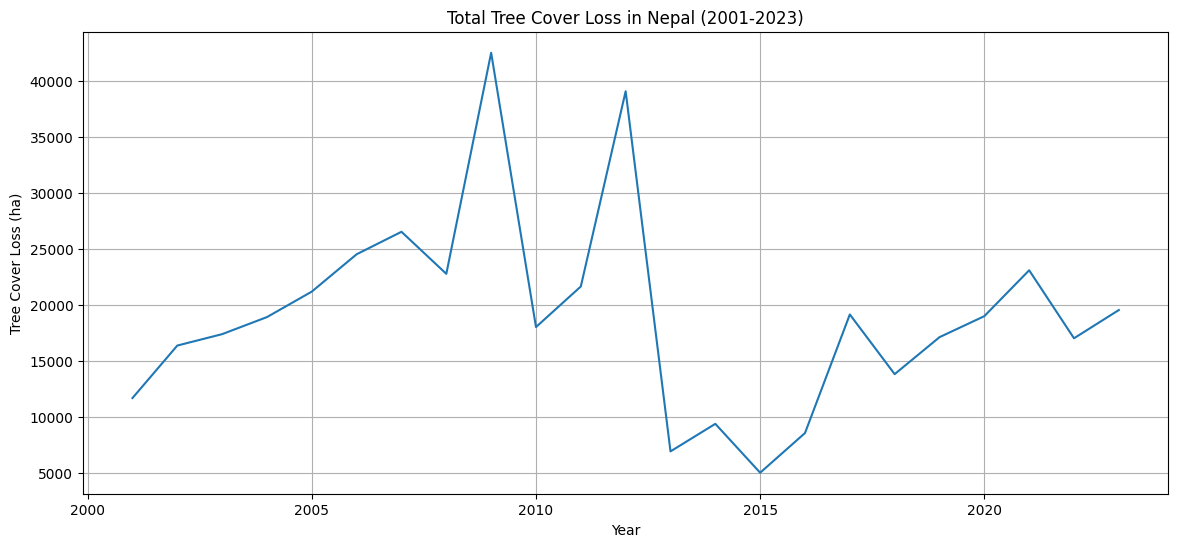

In [23]:
# Get all tree cover loss columns
loss_columns = [col for col in tree_loss_df.columns if col.startswith('tc_loss_ha_')]

# Sum loss across all regions for each year
yearly_loss = tree_loss_df[loss_columns].sum()

# Extract years
years = [int(col.split('_')[-1]) for col in loss_columns]

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(x=years, y=yearly_loss.values)
plt.title('Total Tree Cover Loss in Nepal (2001-2023)')
plt.xlabel('Year')
plt.ylabel('Tree Cover Loss (ha)')
plt.grid(True)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_34860\1683027694.py:3: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pr_decadal = pr_df['Precipitation'].resample('10AS').mean()


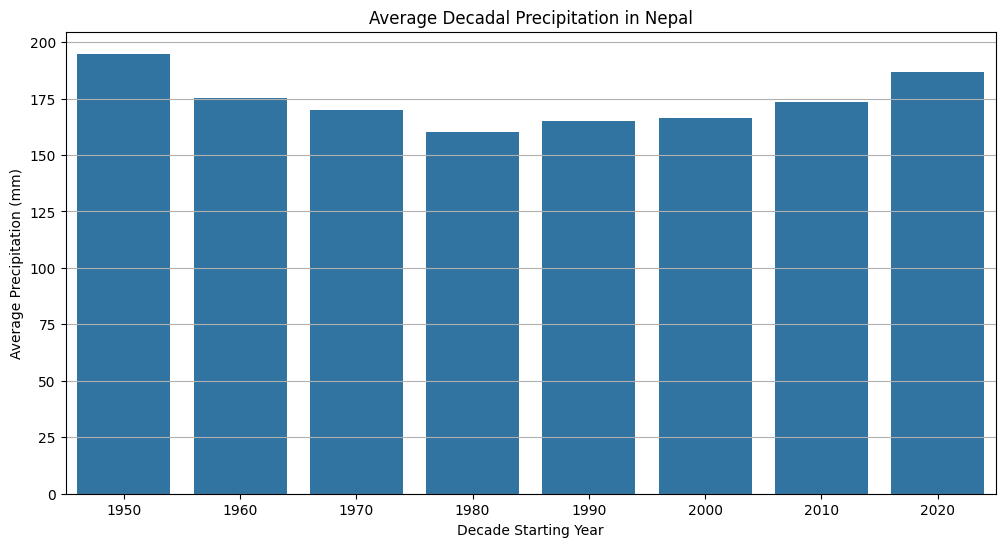

In [24]:
#Average Precipitation by Decade (JSON)
# Resample by decade and compute mean precipitation
pr_decadal = pr_df['Precipitation'].resample('10AS').mean()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=pr_decadal.index.year, y=pr_decadal.values)
plt.title('Average Decadal Precipitation in Nepal')
plt.xlabel('Decade Starting Year')
plt.ylabel('Average Precipitation (mm)')
plt.grid(axis='y')
plt.show()


Tree Loss by Region Over Time (CSV)

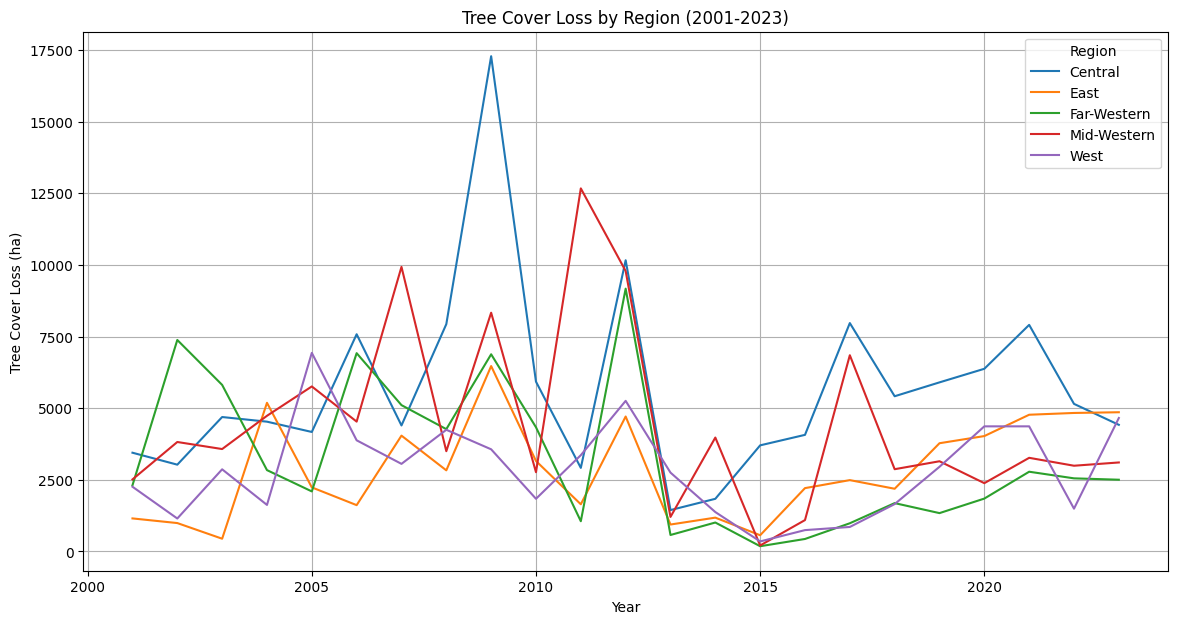

In [25]:
plt.figure(figsize=(14, 7))

# Loop through regions and plot
for region in tree_loss_df['subnational1'].unique():
    region_df = tree_loss_df[tree_loss_df['subnational1'] == region]
    yearly_loss = region_df[loss_columns].sum()
    plt.plot(years, yearly_loss, label=region)

plt.title('Tree Cover Loss by Region (2001-2023)')
plt.xlabel('Year')
plt.ylabel('Tree Cover Loss (ha)')
plt.legend(title='Region')
plt.grid(True)
plt.show()


Precipitation Seasonal Pattern (JSON)

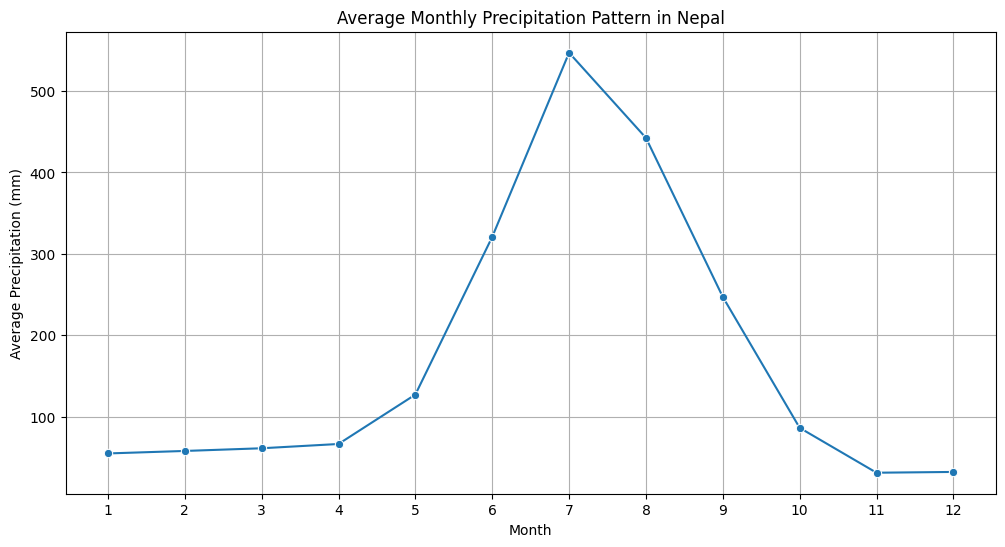

In [26]:
# Create a Month column
pr_df['Month'] = pr_df.index.month

# Average precipitation per month across all years
monthly_avg_precip = pr_df.groupby('Month')['Precipitation'].mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg_precip.index, y=monthly_avg_precip.values, marker='o')
plt.title('Average Monthly Precipitation Pattern in Nepal')
plt.xlabel('Month')
plt.ylabel('Average Precipitation (mm)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


Correlation Insights between Tree Loss and Precipitation

In [27]:
# Tree loss per year summed across all regions and thresholds
tree_loss_yearly = tree_loss_df[loss_columns].sum()

# Convert to DataFrame for easy merging later
tree_loss_yearly_df = pd.DataFrame({
    'Year': years,
    'Tree_Loss': tree_loss_yearly.values
})


In [29]:
#Prepare Annual Precipitation Totals (2001–2023)
# Reset index to access 'Date'
pr_df_reset = pr_df.reset_index()

# Extract Year
pr_df_reset['Year'] = pr_df_reset['Date'].dt.year

# Sum precipitation for each year
annual_precip = pr_df_reset.groupby('Year')['Precipitation'].sum()

# Filter only years 2001-2023 to match tree loss data
annual_precip = annual_precip[annual_precip.index.isin(years)]

# Convert to DataFrame
annual_precip_df = pd.DataFrame({
    'Year': annual_precip.index,
    'Precipitation': annual_precip.values
})


In [30]:
# Merge on 'Year'
combined_df = pd.merge(tree_loss_yearly_df, annual_precip_df, on='Year')

# Display to confirm
print(combined_df)


    Year  Tree_Loss  Precipitation
0   2001      11683        1850.70
1   2002      16371        2038.12
2   2003      17390        2163.78
3   2004      18914        1896.40
4   2005      21190        1787.03
5   2006      24525        1739.41
6   2007      26531        2403.95
7   2008      22776        2133.83
8   2009      42522        1825.23
9   2010      18022        2138.94
10  2011      21647        2212.61
11  2012      39080        1959.77
12  2013       6920        2223.22
13  2014       9381        1934.23
14  2015       5015        1828.33
15  2016       8559        2142.34
16  2017      19147        2066.71
17  2018      13818        2125.48
18  2019      17119        2197.50
19  2020      18997        2476.65
20  2021      23094        2568.24
21  2022      17021        2102.08
22  2023      19544        1815.62


In [31]:
# Calculate correlation
correlation = combined_df['Tree_Loss'].corr(combined_df['Precipitation'])
print(f"Correlation between Tree Loss and Annual Precipitation: {correlation:.2f}")


Correlation between Tree Loss and Annual Precipitation: -0.06


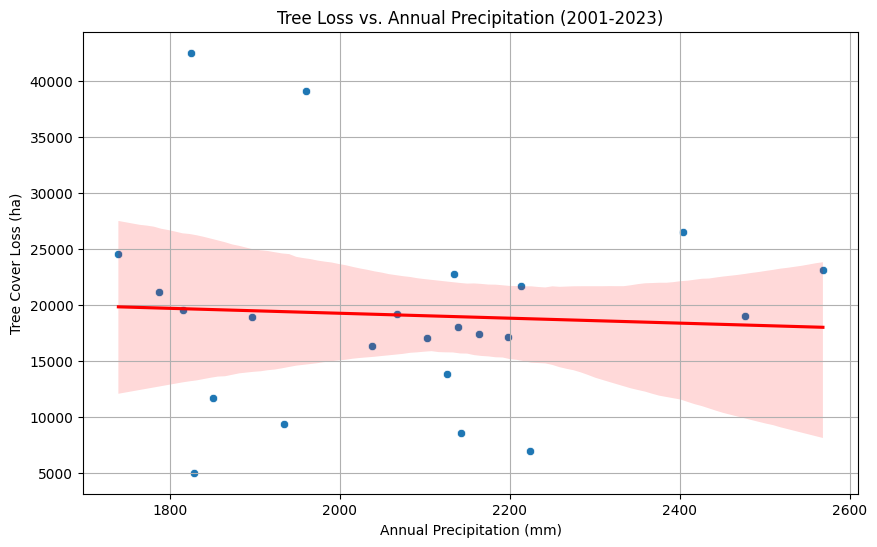

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='Precipitation', y='Tree_Loss')
sns.regplot(data=combined_df, x='Precipitation', y='Tree_Loss', scatter=False, color='red')
plt.title('Tree Loss vs. Annual Precipitation (2001-2023)')
plt.xlabel('Annual Precipitation (mm)')
plt.ylabel('Tree Cover Loss (ha)')
plt.grid(True)
plt.show()


Total Tree loss per row

In [33]:
# Sum all columns that start with 'tc_loss_ha_' (tree cover loss yearly columns)
csv_df['total_tc_loss_2001_2023'] = csv_df[[col for col in csv_df.columns if col.startswith('tc_loss_ha_')]].sum(axis=1)

# Preview the new column
csv_df[['subnational1', 'total_tc_loss_2001_2023']].head()


,subnational1,total_tc_loss_2001_2023
0,Central,24086
1,Central,18206
2,Central,17639
3,Central,17245
4,Central,17012


#Create 5 year rolling average of Tree loss

In [37]:
print(csv_df.columns.tolist())

['country', 'subnational1', 'threshold', 'area_ha', 'extent_2000_ha', 'extent_2010_ha', 'gain_2000-2020_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2002', 'tc_loss_ha_2003', 'tc_loss_ha_2004', 'tc_loss_ha_2005', 'tc_loss_ha_2006', 'tc_loss_ha_2007', 'tc_loss_ha_2008', 'tc_loss_ha_2009', 'tc_loss_ha_2010', 'tc_loss_ha_2011', 'tc_loss_ha_2012', 'tc_loss_ha_2013', 'tc_loss_ha_2014', 'tc_loss_ha_2015', 'tc_loss_ha_2016', 'tc_loss_ha_2017', 'tc_loss_ha_2018', 'tc_loss_ha_2019', 'tc_loss_ha_2020', 'tc_loss_ha_2021', 'tc_loss_ha_2022', 'tc_loss_ha_2023', 'total_tc_loss_2001_2023']


In [38]:
# Transpose to apply rolling across years for each row
tree_loss_cols = [f'tc_loss_ha_{year}' for year in range(2001, 2024)]

rolling_means = csv_df[tree_loss_cols].T.rolling(window=5).mean().T

# Calculate mean across the rolling averages for each row
csv_df['rolling_avg_tc_loss_5yr'] = rolling_means.mean(axis=1)

# Preview results
csv_df[['subnational1', 'total_tc_loss_2001_2023', 'rolling_avg_tc_loss_5yr']].head()


,subnational1,total_tc_loss_2001_2023,rolling_avg_tc_loss_5yr
0,Central,24086,1076.505263
1,Central,18206,825.631579
2,Central,17639,800.273684
3,Central,17245,781.473684
4,Central,17012,771.284211


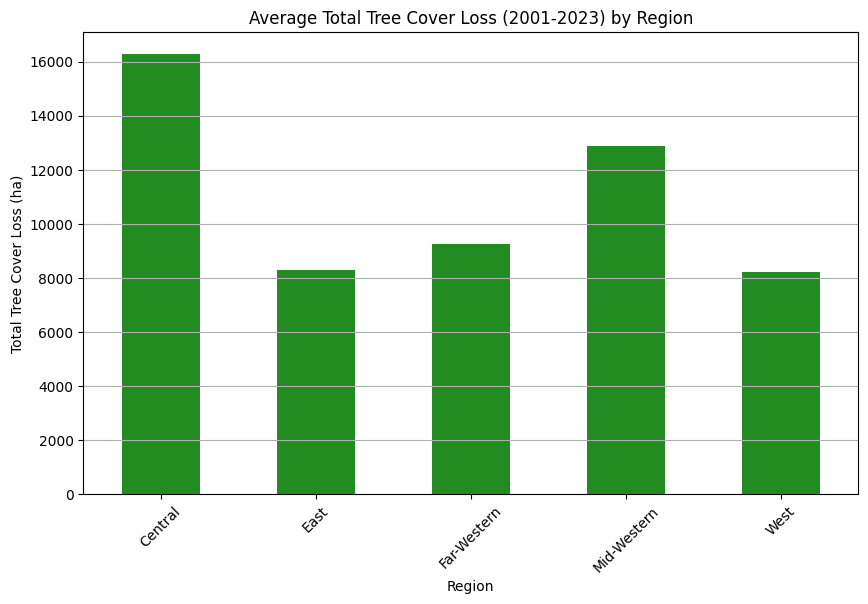

<Figure size 1000x600 with 0 Axes>

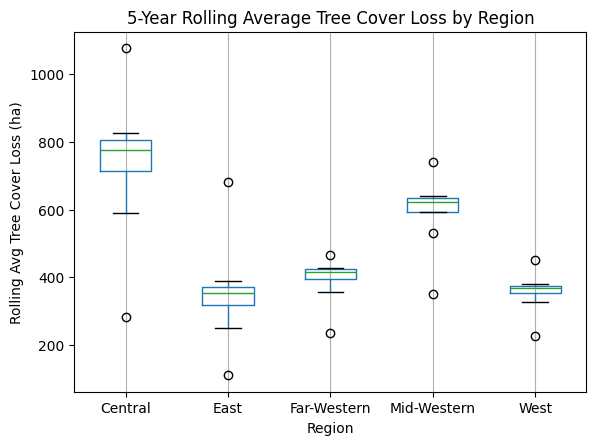

In [39]:
import matplotlib.pyplot as plt

# Plot total tree cover loss by region
plt.figure(figsize=(10,6))
csv_df.groupby('subnational1')['total_tc_loss_2001_2023'].mean().plot(kind='bar', color='forestgreen')
plt.title('Average Total Tree Cover Loss (2001-2023) by Region')
plt.ylabel('Total Tree Cover Loss (ha)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot 5-year rolling average boxplot
plt.figure(figsize=(10,6))
csv_df.boxplot(column='rolling_avg_tc_loss_5yr', by='subnational1')
plt.title('5-Year Rolling Average Tree Cover Loss by Region')
plt.suptitle('')
plt.ylabel('Rolling Avg Tree Cover Loss (ha)')
plt.xlabel('Region')
plt.grid(axis='y')
plt.show()


Monthly Precipitation Trend (1950–2023)

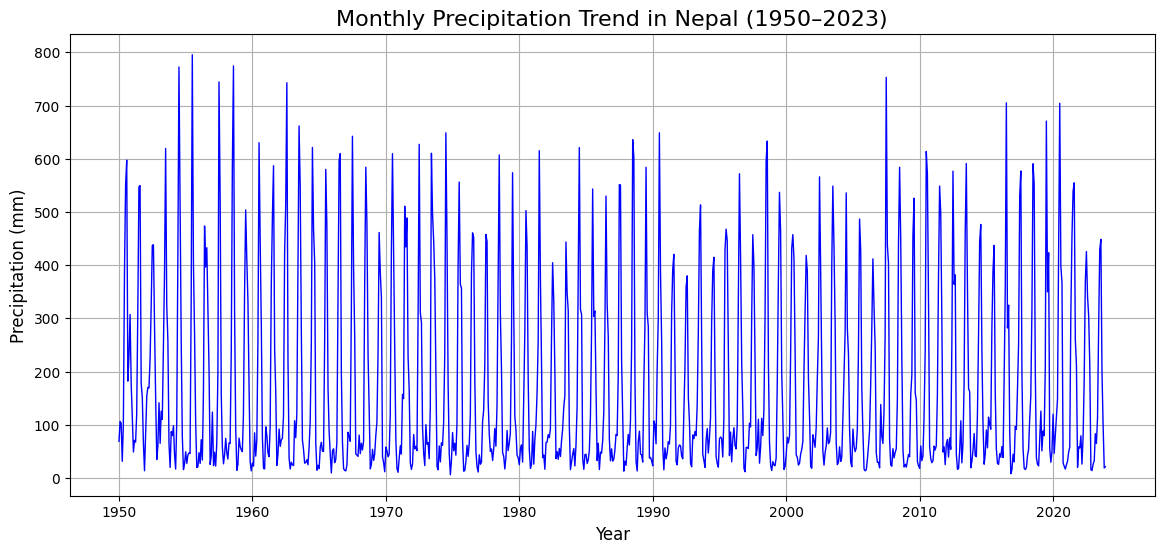

In [40]:
import matplotlib.pyplot as plt

# Plot monthly precipitation trend
plt.figure(figsize=(14, 6))
plt.plot(pr_df.index, pr_df['Precipitation'], color='blue', linewidth=1)
plt.title('Monthly Precipitation Trend in Nepal (1950–2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize=12)
plt.grid(True)
plt.show()


Yearly Average Precipitation Trend

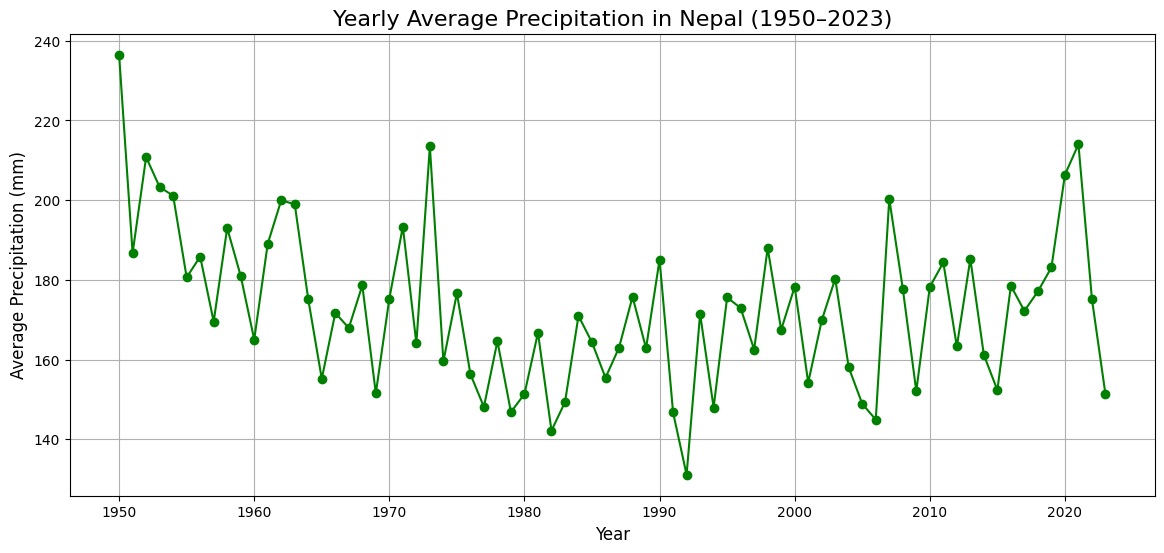

In [41]:
# Group by year and calculate mean precipitation
pr_df['Year'] = pr_df.index.year
yearly_precip = pr_df.groupby('Year')['Precipitation'].mean()

# Plot yearly average precipitation
plt.figure(figsize=(14, 6))
plt.plot(yearly_precip.index, yearly_precip.values, color='green', marker='o')
plt.title('Yearly Average Precipitation in Nepal (1950–2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Precipitation (mm)', fontsize=12)
plt.grid(True)
plt.show()


preparation for correlation

In [42]:
# Extract year columns related to tree cover loss
tree_loss_years = [col for col in csv_df.columns if 'tc_loss_ha_' in col]

# Extract years as integers
tree_loss_year_numbers = [int(col.split('_')[-1]) for col in tree_loss_years]

# Calculate total tree loss across all regions for each year
total_tree_loss_by_year = csv_df[tree_loss_years].sum(axis=0)

# Convert to a DataFrame for easy plotting
tree_loss_df = pd.DataFrame({'Year': tree_loss_year_numbers, 'Tree_Cover_Loss_ha': total_tree_loss_by_year.values})

tree_loss_df.head()


,Year,Tree_Cover_Loss_ha
0,2001,11683
1,2002,16371
2,2003,17390
3,2004,18914
4,2005,21190


lot Tree Cover Loss vs. Precipitation Over Time

In [43]:
# Prepare precipitation data
pr_df['Year'] = pr_df.index.year
precip_by_year = pr_df.groupby('Year')['Precipitation'].mean().reset_index()

# Merge the two datasets on 'Year'
merged_df = pd.merge(tree_loss_df, precip_by_year, on='Year', how='inner')

merged_df.head()


,Year,Tree_Cover_Loss_ha,Precipitation
0,2001,11683,154.225000
1,2002,16371,169.843333
2,2003,17390,180.315000
3,2004,18914,158.033333
4,2005,21190,148.919167


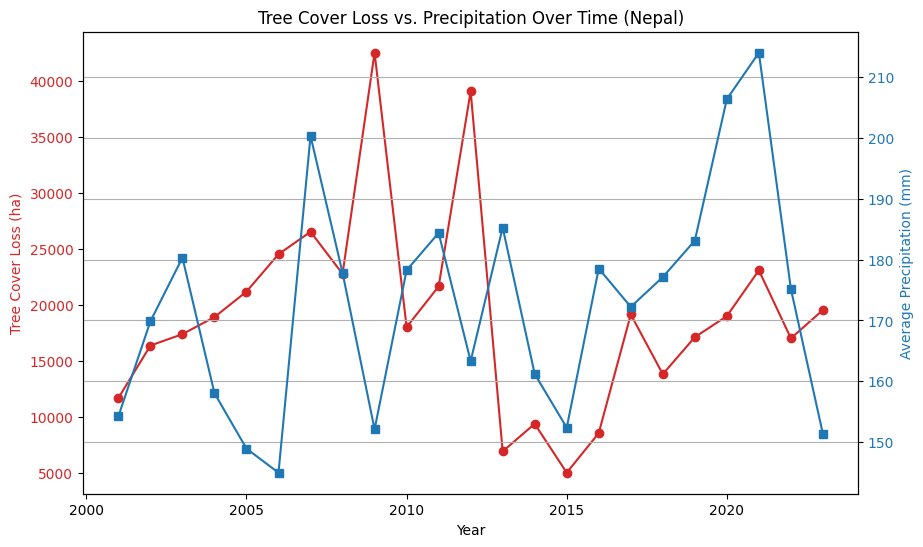

In [44]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Tree Cover Loss
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Tree Cover Loss (ha)', color=color)
ax1.plot(merged_df['Year'], merged_df['Tree_Cover_Loss_ha'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Plot Precipitation on second y-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Precipitation (mm)', color=color)
ax2.plot(merged_df['Year'], merged_df['Precipitation'], color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Tree Cover Loss vs. Precipitation Over Time (Nepal)')
plt.grid()
plt.show()


In [45]:
correlation = merged_df['Tree_Cover_Loss_ha'].corr(merged_df['Precipitation'])
print(f'Correlation between Tree Cover Loss and Precipitation: {correlation:.2f}')


Correlation between Tree Cover Loss and Precipitation: -0.06


Create Climate Indices

In [46]:
# Calculate long-term mean precipitation
mean_precip = annual_precip.mean()

# Create a new column for precipitation anomaly
annual_precip_df['precip_anomaly'] = annual_precip - mean_precip

# Preview
annual_precip_df.head()


,Year,Precipitation,precip_anomaly
0,2001,1850.70,NaN
1,2002,2038.12,NaN
2,2003,2163.78,NaN
3,2004,1896.40,NaN
4,2005,1787.03,NaN


Add Lag Features for Tree Loss

In [47]:
# Create annual total tree cover loss DataFrame
annual_tc_loss = pd.DataFrame({
    'Year': tree_loss_years,
    'total_tc_loss': csv_df[tree_loss_cols].sum(axis=0).values
})

# Shift tree cover loss by 1 year to create lag feature
annual_tc_loss['tc_loss_lag1'] = annual_tc_loss['total_tc_loss'].shift(1)

# For the first year, it will be NaN (no previous year)
annual_tc_loss.head()


,Year,total_tc_loss,tc_loss_lag1
0,tc_loss_ha_2001,11683,NaN
1,tc_loss_ha_2002,16371,11683.0
2,tc_loss_ha_2003,17390,16371.0
3,tc_loss_ha_2004,18914,17390.0
4,tc_loss_ha_2005,21190,18914.0


In [48]:
# Extract the year number from 'tc_loss_ha_YYYY' column names
annual_tc_loss['Year'] = annual_tc_loss['Year'].str.extract(r'(\d{4})').astype(int)
annual_precip_df['Year'] = annual_precip_df['Year'].astype(int)

# Now merge (should work now)
features_df = pd.merge(annual_tc_loss, annual_precip_df, on='Year')

features_df.head()


,Year,total_tc_loss,tc_loss_lag1,Precipitation,precip_anomaly
0,2001,11683,NaN,1850.70,NaN
1,2002,16371,11683.0,2038.12,NaN
2,2003,17390,16371.0,2163.78,NaN
3,2004,18914,17390.0,1896.40,NaN
4,2005,21190,18914.0,1787.03,NaN


Spatial proximity feature

In [49]:
# Define simple proximity codes (just an example)
region_proximity = {
    'Far-Western': 1,
    'Mid-Western': 2,
    'West': 3,
    'Central': 4,
    'East': 5
}

# Map the codes to the CSV dataframe
csv_df['region_proximity'] = csv_df['subnational1'].map(region_proximity)

# Preview the new feature
csv_df[['subnational1', 'region_proximity']].drop_duplicates()


,subnational1,region_proximity
0,Central,4
8,East,5
16,Far-Western,1
24,Mid-Western,2
32,West,3


In [50]:
features_df.columns


Index(['Year', 'total_tc_loss', 'tc_loss_lag1', 'Precipitation',
       'precip_anomaly'],
      dtype='object')

In [51]:
from sklearn.preprocessing import StandardScaler


In [52]:
numeric_features = ['total_tc_loss', 'tc_loss_lag1', 'Precipitation']
# print(features_df.columns.tolist())


In [53]:
scaler = StandardScaler()

# Scale and create a DataFrame
scaled_values = scaler.fit_transform(features_df[numeric_features])
scaled_df = pd.DataFrame(scaled_values, columns=[f'scaled_{col}' for col in numeric_features])

# Concatenate with the original DataFrame (keeping Year as is)
final_features = pd.concat([features_df[['Year']], scaled_df], axis=1)

# Preview
final_features.head()


,Year,scaled_total_tc_loss,scaled_tc_loss_lag1,scaled_Precipitation
0,2001,-0.855525,NaN,-1.009376
1,2002,-0.314673,-0.834485,-0.150171
2,2003,-0.197111,-0.305490,0.425903
3,2004,-0.021288,-0.190505,-0.799870
4,2005,0.241293,-0.018537,-1.301264


In [54]:
final_features.to_csv('final_features.csv', index=False)
print("Final features saved to final_features.csv")


Final features saved to final_features.csv


In [56]:
print(features_df.columns.tolist())

['Year', 'total_tc_loss', 'tc_loss_lag1', 'Precipitation', 'precip_anomaly']


In [57]:
from sklearn.preprocessing import StandardScaler

# Scale the numeric features including Sentiment_Score
numeric_features = ['total_tc_loss', 'tc_loss_lag1', 'Precipitation']

scaler = StandardScaler()
scaled_values = scaler.fit_transform(features_df[numeric_features])

scaled_df = pd.DataFrame(scaled_values, columns=[f'scaled_{col}' for col in numeric_features])

# Add the Year back
scaled_df['Year'] = features_df['Year']

# Preview
scaled_df.head()


,scaled_total_tc_loss,scaled_tc_loss_lag1,scaled_Precipitation,Year
0,-0.855525,NaN,-1.009376,2001
1,-0.314673,-0.834485,-0.150171,2002
2,-0.197111,-0.305490,0.425903,2003
3,-0.021288,-0.190505,-0.799870,2004
4,0.241293,-0.018537,-1.301264,2005
